In [1]:
!pip install keras
!pip install tensorflow
from tensorflow.keras import Sequential
#Importing Necessary libraries to be used
import numpy as np
# for linear algebra
import pandas as pd
# data preprocessing
import matplotlib.pyplot as plt 
# data visualization library
import seaborn as sns 
# data visualization library
%matplotlib inline
 # ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler 
# for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

C:\Users\manis\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
#df = pd.read_csv('/content/drive/MyDrive/Bharat_Intern/GOOG.csv') # importing the data
df = pd.read_csv("C:/Users/manis/Downloads/NFLX.csv")
df.head(5) # fetching first 5 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [10]:
# shape of data
print("Shape of data:",df.shape)
     

Shape of data: (1009, 7)


In [11]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [12]:
# summary of data
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [13]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
df = df[['Date','Open','Close']] 
# Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))
# converting object dtype of date column to datetime dtype for real time and dynamic analysis
df.set_index('Date',drop=True,inplace=True)
# Setting date column as index
df.head(10)
     

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001
2018-02-12,252.139999,257.950012
2018-02-13,257.290009,258.269989
2018-02-14,260.470001,266.000000
2018-02-15,270.029999,280.269989


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>]], dtype=object)

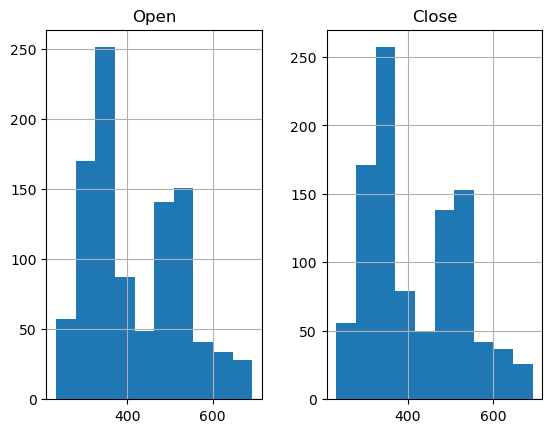

In [15]:
df.hist()
     

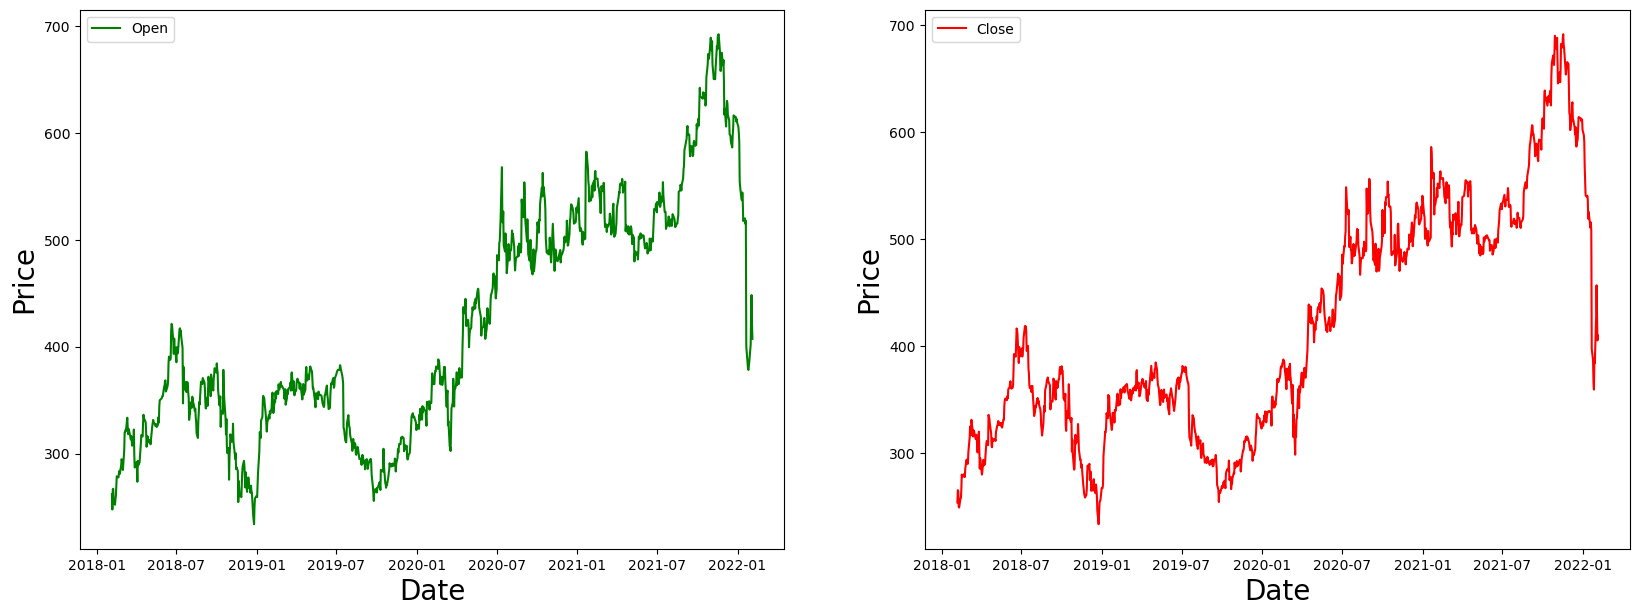

In [16]:
# plotting open and closing price on date index

fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=20)
ax[0].set_ylabel('Price',size=20)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=20)
ax[1].set_ylabel('Price',size=20)
ax[1].legend()

fig.show()

In [17]:
# Normalizing all the values of all columns using MinMaxScaler function ()
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


In [18]:
df.tail(10)

,Open,Close
Date,,
2022-01-24,0.327182,0.334790
2022-01-25,0.316777,0.289509
2022-01-26,0.314879,0.274830
2022-01-27,0.323146,0.333807
2022-01-28,0.333399,0.328695
2022-01-31,0.366577,0.422140
2022-02-01,0.434178,0.487648
2022-02-02,0.467531,0.427251
2022-02-03,0.409048,0.375090


In [19]:
# Splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size
     

757

In [20]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape
     

((757, 2), (252, 2))

In [21]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))
     

In [22]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 2), (707, 2), (202, 50, 2), (202, 2))

In [23]:
# Imported Sequential from keras.models
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Fitting the model by iterating the dataset over 100 times(100 epochs)

model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
23/23 [==============================] - 18s 188ms/step - loss: 0.0222 - mean_absolute_error: 0.1065 - val_loss: 0.0183 - val_mean_absolute_error: 0.1123
Epoch 2/100
23/23 [==============================] - 2s 75ms/step - loss: 0.0034 - mean_absolute_error: 0.0454 - val_loss: 0.0075 - val_mean_absolute_error: 0.0605
Epoch 3/100
23/23 [==============================] - 2s 75ms/step - loss: 0.0025 - mean_absolute_error: 0.0379 - val_loss: 0.0062 - val_mean_absolute_error: 0.0539
Epoch 4/100
23/23 [==============================] - 2s 80ms/step - loss: 0.0022 - mean_absolute_error: 0.0359 - val_loss: 0.0063 - val_mean_absolute_error: 0.0534
Epoch 5/100
23/23 [==============================] - 2s 74ms/step - loss: 0.0022 - mean_absolute_error: 0.0352 - val_loss: 0.0062 - val_mean_absolute_error: 0.0531
Epoch 6/100
23/23 [==============================] - 2s 72ms/step - loss: 0.0021 - mean_absolute_error: 0.0343 - val_loss: 0.0080 - val_mean_absolute_error: 0.0631
Epoch 7/100
23

In [25]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 2s 24ms/step


array([[0.6872082 , 0.6883038 ],
       [0.5949137 , 0.60144687],
       [0.59964085, 0.60370666],
       [0.5997722 , 0.60464734],
       [0.60915524, 0.61381334]], dtype=float32)

In [26]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[548.95685, 548.9924 ],
       [506.6463 , 509.2284 ],
       [508.81335, 510.26294],
       [508.87357, 510.6936 ],
       [513.175  , 514.8899 ]], dtype=float32)

In [28]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-202:].copy(),
pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df.iloc[-202:].index)], axis=1)
     

In [29]:
# Inversing normalization/scaling
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-21,508.000000,508.899994,548.956848,548.992371
2021-04-22,513.820007,508.779999,506.646301,509.228394
2021-04-23,509.010010,505.549988,508.813354,510.262939
2021-04-26,506.760010,510.299988,508.873566,510.693604
2021-04-27,512.619995,505.549988,513.174988,514.889893


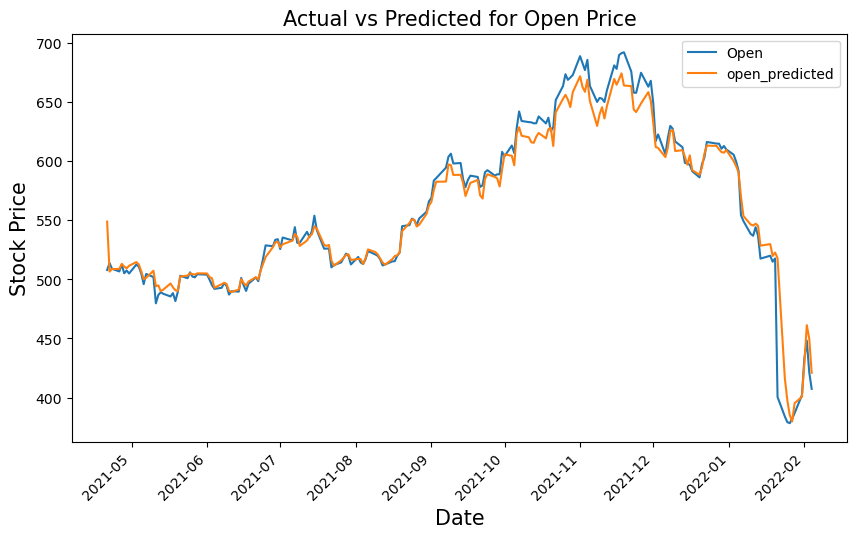

In [30]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price',size=15)
plt.show()

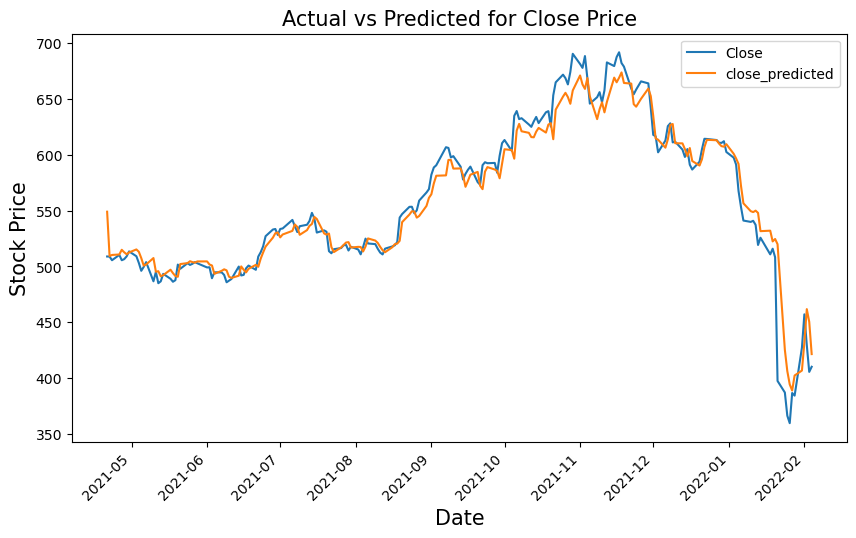

In [31]:
# plotting the actual close and predicted close prices on date index
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price',size=15)
plt.show()

In [32]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']
     

,Open,Close,open_predicted,close_predicted
2021-06-09,494.500000,485.809998,496.152008,496.488861
2021-06-10,487.170013,487.269989,490.199921,490.775604
2021-06-11,490.000000,488.769989,489.312195,489.725464
2021-06-14,489.679993,499.890015,491.444763,491.683075
2021-06-15,501.230011,491.899994,500.256317,500.025726
2021-06-16,495.000000,492.410004,496.974762,497.052399


In [33]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [34]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)
     

1/1 [==============================] - 0s 47ms/step


In [35]:
# Inversing Normalization/scaling

upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

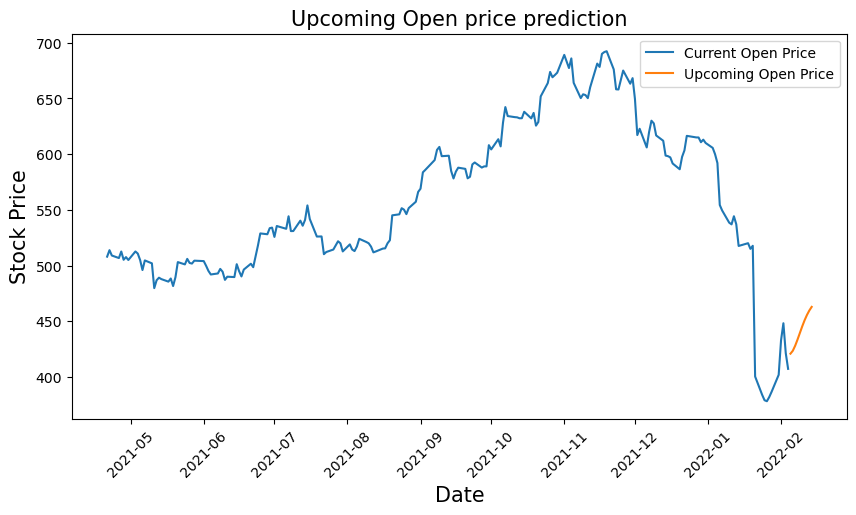

In [36]:
# Plotting Upcoming Open price on date index

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()
     

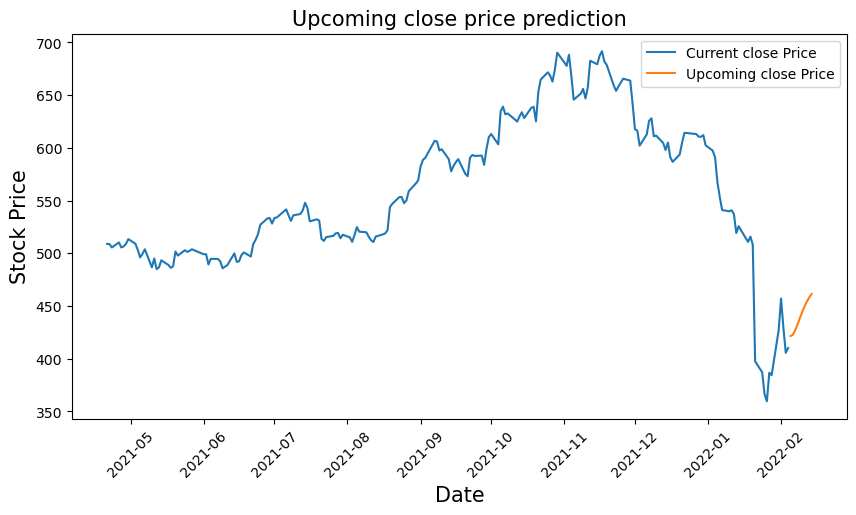

In [37]:
# Plotting Upcoming Close price on date index

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

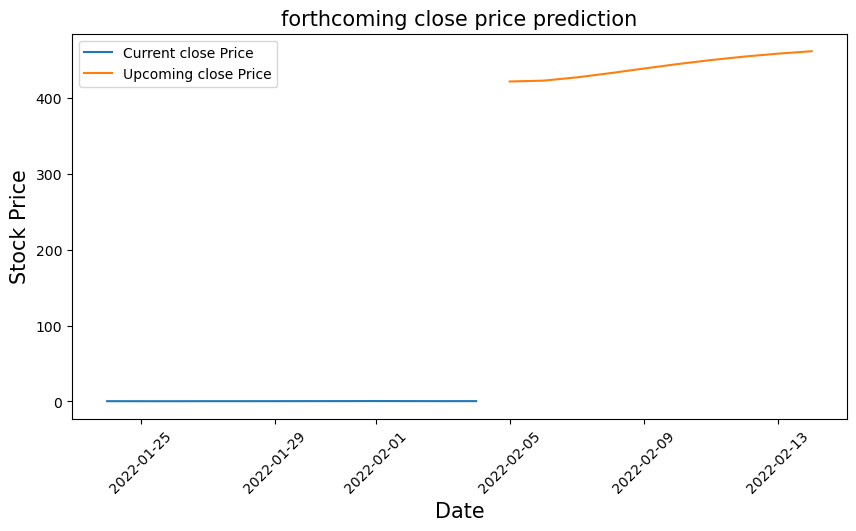

In [38]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()